# EDA

In [1]:
import pandas
import numpy

csv_path = input("Enter 'diabetic_data.csv' path")

with open(csv_path, "r") as csv_file:
    df = pandas.read_csv(csv_file)

df = df.replace({"?": numpy.nan})

Enter 'diabetic_data.csv' path /home/sio/PycharmProjects/project/diabetic_data.csv


In [2]:
df.head(5)

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [3]:
len(df)

101766

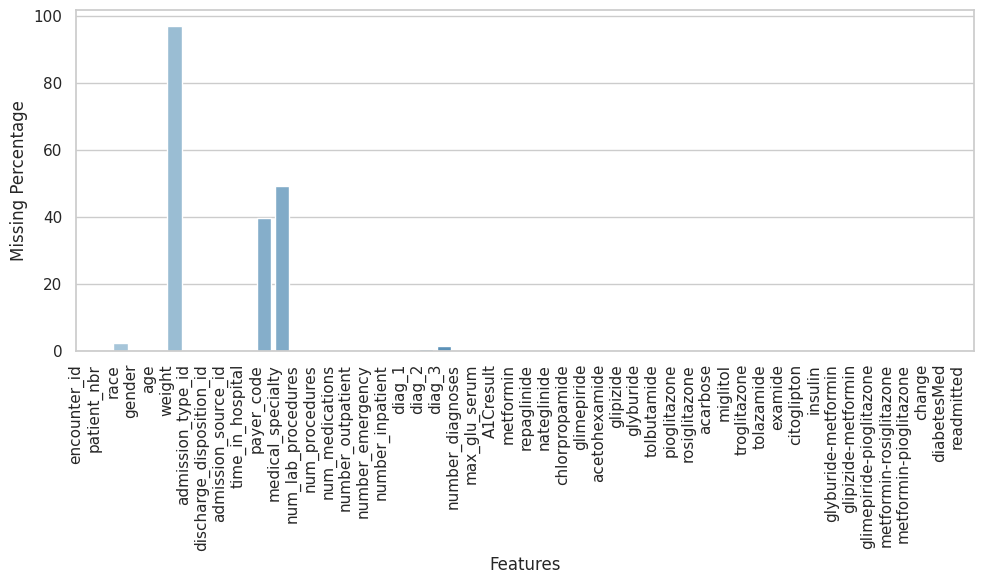

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

missing_percentage = (df.isnull().sum() / len(df)) * 100
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="Blues_d")


plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()


# Process data

In [5]:
# Remove duplicate patients while keeping first encounter
df = df.sort_values(by="encounter_id")
df = df.drop_duplicates(subset="patient_nbr", keep="first")

# Define whether a patient is sick based on readmission
df["is_sick"] = df["readmitted"].apply(lambda x: {"NO": False,
                                                 "<30": True,
                                                 ">30": False}[x])

# Convert age to continoues numbers
df["age_continuous"] = df["age"].apply(lambda x: {'[0-10)': 10,
                                                  '[10-20)': 20,
                                                  '[20-30)': 30,
                                                  '[30-40)': 40,
                                                  '[40-50)': 50,
                                                  '[50-60)': 60,
                                                  '[60-70)': 70,
                                                  '[70-80)': 80,
                                                  '[80-90)': 90,
                                                  '[90-100)': 100}[x])

# Shrink admission_source_id_shrunk values
df["admission_source_id_shrunk"] = df["admission_source_id"].apply(lambda x: {1: 'Physician',
                                                                              2: 'Physician',
                                                                              3: 'Physician',
                                                                              4: 'Other',
                                                                              5: 'Other',
                                                                              6: 'Other',
                                                                              7: 'Emergency Room',
                                                                              8: 'Other',
                                                                              9: numpy.nan,
                                                                              10: 'Other',
                                                                              11: 'Other',
                                                                              12: 'Other',
                                                                              13: 'Other',
                                                                              14: 'Other',
                                                                              15: numpy.nan,
                                                                              17: numpy.nan,
                                                                              18: 'Other',
                                                                              19: 'Other',
                                                                              20: numpy.nan,
                                                                              21: numpy.nan,
                                                                              22: 'Other',
                                                                              23: 'Other',
                                                                              24: 'Other',
                                                                              25: 'Other',
                                                                              26: 'Other'}[x])

# Shrink admission_type_id_shrunk values
df["admission_type_id_shrunk"] = df["admission_type_id"].apply(lambda x: {1: 'Emergency',
                                                                          2: 'Emergency',
                                                                          3: 'Elective',
                                                                          4: 'Other',
                                                                          5: numpy.nan,
                                                                          6: numpy.nan,
                                                                          7: 'Other',
                                                                          8: numpy.nan}[x])

# Shrink discharge_dispodition_id values, and drop unwanted rows (e.g. expired patients)
df["discharge_disposition_id_shrunk"] = df["discharge_disposition_id"].apply(lambda x: {1: 'Discharged to home',
                                                                                        2: 'Transferred',
                                                                                        3: 'Transferred',
                                                                                        4: 'Transferred',
                                                                                        5: 'Transferred',
                                                                                        6: 'Transferred',
                                                                                        7: 'DROP',
                                                                                        8: 'Transferred',
                                                                                        9: 'DROP',
                                                                                        10: 'DROP',
                                                                                        11: 'DROP',
                                                                                        12: 'DROP',
                                                                                        13: 'DROP',
                                                                                        14: 'DROP',
                                                                                        15: 'Transferred',
                                                                                        16: 'Transferred',
                                                                                        17: 'Transferred',
                                                                                        18: 'None',
                                                                                        19: 'DROP',
                                                                                        20: 'DROP',
                                                                                        21: 'DROP',
                                                                                        22: 'Transferred',
                                                                                        23: 'Transferred',
                                                                                        24: 'Transferred',
                                                                                        25: 'None',
                                                                                        26: 'None',
                                                                                        27: 'Transferred',
                                                                                        28: 'Transferred',
                                                                                        29: 'Transferred',
                                                                                        30: 'Transferred'}[x])
df = df[lambda x: x["discharge_disposition_id_shrunk"] != "DROP"]

# Convert diag_1/2/3 from wide range of numbers to their string description
for diag_num in range(1, 4):
    
    diag_feature = f"diag_{diag_num}"
    diag_desc_list = []
    
    for diag_value in df[diag_feature]:
        if diag_value is numpy.nan:
            diag_desc_list.append(numpy.nan)
            continue
        elif any(c.isalpha() for c in diag_value):
            # In case it has non-numerical char
            diag_value = -1
        else:
            # Cast value to float
            diag_value = float(diag_value)

        # Begin mapping
        if diag_value in list(range(390, 459)) + [785]:
            diag_desc_list.append("Circulatory")
        elif diag_value in list(range(460, 519)) + [786]:
            diag_desc_list.append("Respiratory")
        elif diag_value in list(range(520, 579)) + [787]:
            diag_desc_list.append("Digestive")
        elif diag_value >= 250 and diag_value < 251:
            diag_desc_list.append("Diabetes")
        elif diag_value in list(range(800, 999)):
            diag_desc_list.append("Injury")
        elif diag_value in list(range(710, 739)):
            diag_desc_list.append("Musculoskeletal")
        elif diag_value in list(range(580, 629)) + [788]:
            diag_desc_list.append("Genitourinary")
        elif diag_value in list(range(140, 239)):
            diag_desc_list.append("Neoplasms")
        else:
            diag_desc_list.append("Other")

    new_diag_feature = f"{diag_feature}_desc"
    df[new_diag_feature] = diag_desc_list


# Exisitng features to be used to derive the new "medication instability count" feature
medication_column = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                     'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                     'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                     'metformin-rosiglitazone', 'metformin-pioglitazone']

# Exisitng features to be used to derive the new "health state count" feature
health_state = ["time_in_hospital", "num_procedures", "num_medications", "num_lab_procedures", "number_diagnoses"]

medication_instability_count_list = []
health_state_count_list = []

for (row_num, row) in df.iterrows():
    # Count the "Up"s and "Down"s of this patient
    medication_instablity_count = 0
    for med in medication_column:
        med_state = row[med]
        if med_state.lower() in ("up", "down"):
            medication_instablity_count += 1
    medication_instability_count_list.append(medication_instablity_count)

    # Sum the features of health state, assumption is the higher the number,
    # then potentially the poorer health state
    health_state_count = 0
    for hs in health_state:
        health_state_count += row[hs]
    health_state_count_list.append(health_state_count)

medication_instabilty_feature_name = "medication_instablity_count"
health_state_feature_name = "health_state_count"

for new_feature_name, feature_value_list in zip((medication_instabilty_feature_name, health_state_feature_name),
                                                (medication_instability_count_list, health_state_count_list)):
    df[new_feature_name] = feature_value_list





Glance at the newly added/modified features

In [6]:
df[["admission_source_id_shrunk", "admission_type_id_shrunk", "discharge_disposition_id_shrunk", "diag_1_desc", "health_state_count", "medication_instablity_count"]].head(5)

admission_source_id_shrunk admission_type_id_shrunk  \
8                       Other                Emergency   
9                       Other                 Elective   
4              Emergency Room                Emergency   
10             Emergency Room                Emergency   
5                   Physician                Emergency   

   discharge_disposition_id_shrunk  diag_1_desc  health_state_count  \
8               Discharged to home  Circulatory                 119   
9                      Transferred  Circulatory                  74   
4               Discharged to home    Neoplasms                  65   
10              Discharged to home     Diabetes                  84   
5               Discharged to home  Circulatory                  65   

    medication_instablity_count  
8                             0  
9                             0  
4                             0  
10                            0  
5                             0

# Table One

In [7]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html
from tableone import TableOne, load_dataset

columns = ['race', 'gender', 'age_continuous', 'admission_type_id_shrunk', 'discharge_disposition_id_shrunk', 'admission_source_id_shrunk', 
           'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
           'number_inpatient', 'diag_1_desc', 'diag_2_desc', 'diag_3_desc', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 
           'change', 'diabetesMed', 'is_sick', 'health_state_count', 'medication_instablity_count']

categorical = [v for v in columns if "num_" not in v and "number_" not in v and "time_" not in v]
categorical.remove('health_state_count')
categorical.remove('medication_instablity_count')
categorical.remove('age_continuous')

groupby = ['is_sick']

table_one = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, pval=True)
table_one_str = table_one.tabulate(tablefmt='html')
display_html(table_one_str, raw=True)



Missing Overall False True P-Value 
 
 
 n 69547 63312 6235 
 race, n (%) AfricanAmerican 1908 12537 (18.5) 11449 (18.6) 1088 (17.9) 0.022 
 Asian 488 (0.7) 447 (0.7) 41 (0.7) 
 Caucasian 51996 (76.9) 47230 (76.7) 4766 (78.2) 
 Hispanic 1481 (2.2) 1359 (2.2) 122 (2.0) 
 Other 1137 (1.7) 1060 (1.7) 77 (1.3) 
 gender, n (%) Female 0 37066 (53.3) 33720 (53.3) 3346 (53.7) 0.717 
 Male 32478 (46.7) 29589 (46.7) 2889 (46.3) 
 Unknown/Invalid 3 (0.0) 3 (0.0) 
 age_continuous, mean (SD) 0 70.5 (15.9) 70.3 (16.0) 72.9 (15.1) <0.001 
 admission_type_id_shrunk, n (%) Elective 7839 13754 (22.3) 12618 (22.4) 1136 (20.6) 0.005 
 Emergency 47927 (77.7) 43561 (77.5) 4366 (79.3) 
 Other 27 (0.0) 26 (0.0) 1 (0.0) 
 discharge_disposition_id_shrunk, n (%) Discharged to home 0 44317 (63.7) 41239 (65.1) 3078 (49.4) <0.001 
 None 3252 (4.7) 2953 (4.7) 299 (4.8) 
 Transferred 21978 (31.6) 19120 (30.2) 2858 (45.8) 
 admission_source_id_shrunk, n (%) Emergency Room 5052 36936 (57.3) 33519 (57.1) 3417 (59.1) 0.012 
 Other 4838 (7.5) 4434 (7.6) 404 (7.0) 
 Physician 22721 (35.2) 20757 (35.4) 1964 (33.9) 
 time_in_hospital, mean (SD) 0 4.3 (2.9) 4.2 (2.9) 4.8 (3.1) <0.001 
 num_lab_procedures, mean (SD) 0 42.9 (19.9) 42.7 (19.9) 44.9 (19.3) <0.001 
 num_procedures, mean (SD) 0 1.4 (1.8) 1.4 (1.8) 1.4 (1.7) 0.910 
 num_medications, mean (SD) 0 15.7 (8.3) 15.6 (8.3) 16.7 (8.3) <0.001 
 number_outpatient, mean (SD) 0 0.3 (1.1) 0.3 (1.1) 0.3 (1.0) 0.028 
 number_emergency, mean (SD) 0 0.1 (0.5) 0.1 (0.5) 0.1 (0.6) <0.001 
 number_inpatient, mean (SD) 0 0.2 (0.6) 0.2 (0.5) 0.4 (1.0) <0.001 
 diag_1_desc, n (%) Circulatory 9 21226 (30.5) 19179 (30.3) 2047 (32.8) <0.001 
 Diabetes 5677 (8.2) 5160 (8.2) 517 (8.3) 
 Digestive 6441 (9.3) 5925 (9.4) 516 (8.3) 
 Genitourinary 3423 (4.9) 3115 (4.9) 308 (4.9) 
 Injury 4655 (6.7) 4150 (6.6) 505 (8.1) 
 Musculoskeletal 4057 (5.8) 3717 (5.9) 340 (5.5) 
 Neoplasms 2509 (3.6) 2283 (3.6) 226 (3.6) 
 Other 12168 (17.5) 11076 (17.5) 1092 (17.5) 
 Respiratory 9382 (13.5) 8700 (13.7) 682 (10.9) 
 diag_2_desc, n (%) Circulatory 289 21953 (31.7) 19923 (31.6) 2030 (32.6) <0.001 
 Diabetes 9629 (13.9) 8805 (14.0) 824 (13.2) 
 Digestive 2832 (4.1) 2595 (4.1) 237 (3.8) 
 Genitourinary 5300 (7.7) 4826 (7.7) 474 (7.6) 
 Injury 1794 (2.6) 1616 (2.6) 178 (2.9) 
 Musculoskeletal 1290 (1.9) 1189 (1.9) 101 (1.6) 
 Neoplasms 1594 (2.3) 1388 (2.2) 206 (3.3) 
 Other 18004 (26.0) 16406 (26.0) 1598 (25.7) 
 Respiratory 6862 (9.9) 6288 (10.0) 574 (9.2) 
 diag_3_desc, n (%) Circulatory 1210 20699 (30.3) 18849 (30.3) 1850 (30.0) <0.001 
 Diabetes 12474 (18.3) 11400 (18.3) 1074 (17.4) 
 Digestive 2679 (3.9) 2424 (3.9) 255 (4.1) 
 Genitourinary 4032 (5.9) 3630 (5.8) 402 (6.5) 
 Injury 1384 (2.0) 1243 (2.0) 141 (2.3) 
 Musculoskeletal 1357 (2.0) 1244 (2.0) 113 (1.8) 
 Neoplasms 1138 (1.7) 998 (1.6) 140 (2.3) 
 Other 19975 (29.2) 18242 (29.3) 1733 (28.1) 
 Respiratory 4599 (6.7) 4132 (6.6) 467 (7.6) 
 number_diagnoses, mean (SD) 0 7.2 (2.0) 7.2 (2.0) 7.5 (1.8) <0.001 
 max_glu_serum, n (%) >200 0 928 (1.3) 827 (1.3) 101 (1.6) 0.058 
 >300 706 (1.0) 634 (1.0) 72 (1.2) 
 None 66230 (95.2) 60334 (95.3) 5896 (94.6) 
 Norm 1683 (2.4) 1517 (2.4) 166 (2.7) 
 A1Cresult, n (%) >7 0 2844 (4.1) 2600 (4.1) 244 (3.9) 0.078 
 >8 6165 (8.9) 5661 (8.9) 504 (8.1) 
 None 56834 (81.7) 51667 (81.6) 5167 (82.9) 
 Norm 3704 (5.3) 3384 (5.3) 320 (5.1) 
 change, n (%) Ch 0 31315 (45.0) 28358 (44.8) 2957 (47.4) <0.001 
 No 38232 (55.0) 34954 (55.2) 3278 (52.6) 
 diabetesMed, n (%) No 0 16566 (23.8) 15326 (24.2) 1240 (19.9) <0.001 
 Yes 52981 (76.2) 47986 (75.8) 4995 (80.1) 
 is_sick, n (%) False 0 63312 (91.0) 63312 (100.0) <0.001 
 True 6235 (9.0) 6235 (100.0) 
 health_state_count, mean (SD) 0 71.5 (25.9) 71.1 (25.9) 75.4 (25.6) <0.001 
 medication_instablity_count, mean (SD) 0 0.3 (0.5) 0.3 (0.5) 0.3 (0.5) <0.001

# "is_sick" values distribution

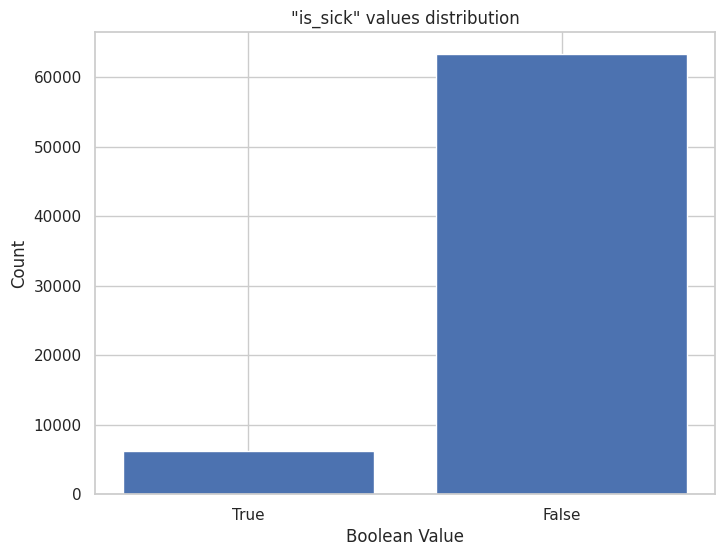

In [8]:
count_true = df['is_sick'].sum()
count_false = len(df) - count_true

plt.figure(figsize=(8, 6))
plt.bar(['True', 'False'], [count_true, count_false])
plt.xlabel('Boolean Value')
plt.ylabel('Count')
plt.title('"is_sick" values distribution')
plt.show()

# Pie charts of different features grouped by 'is_sick' values

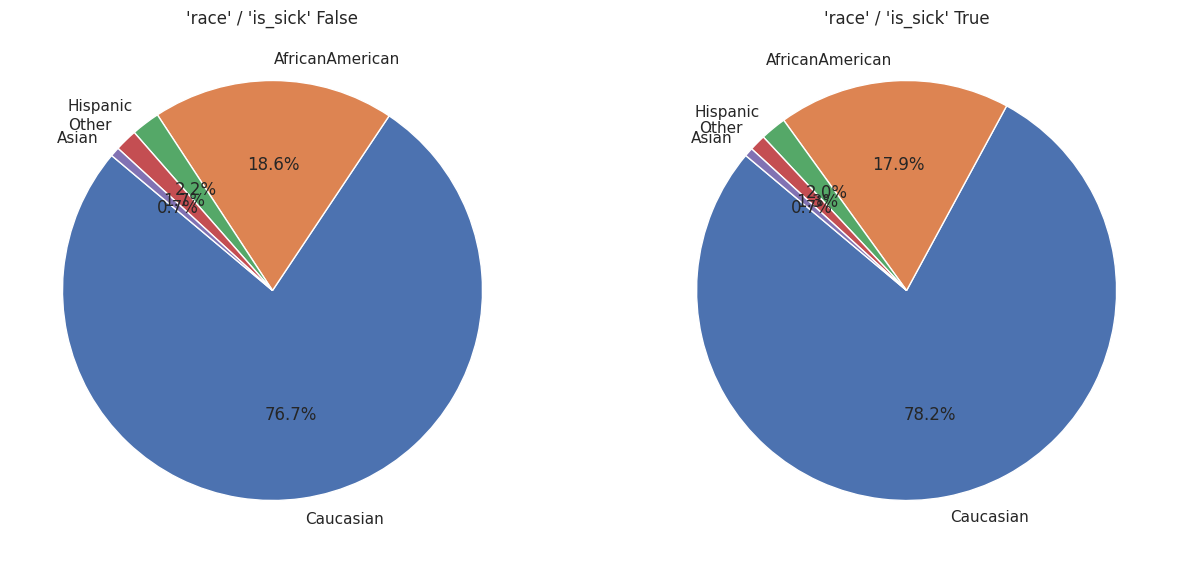

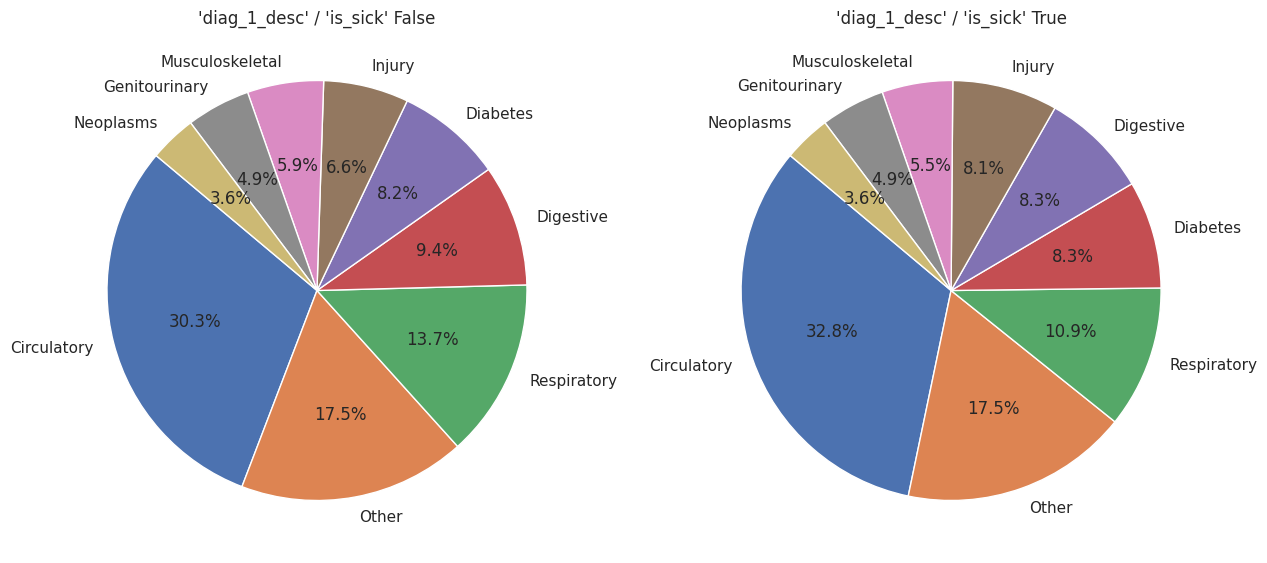

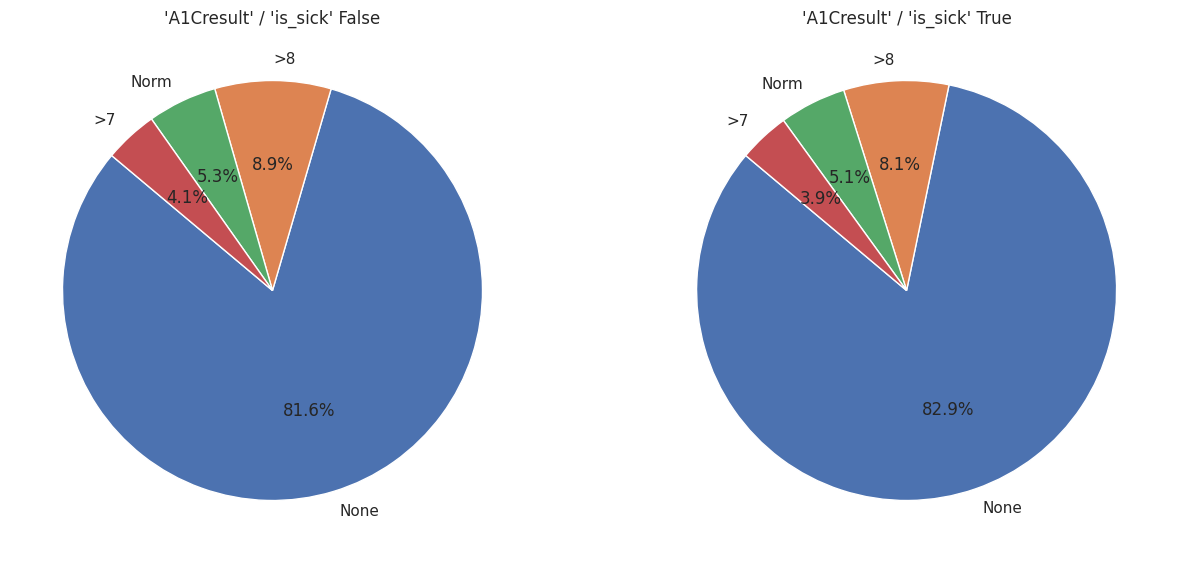

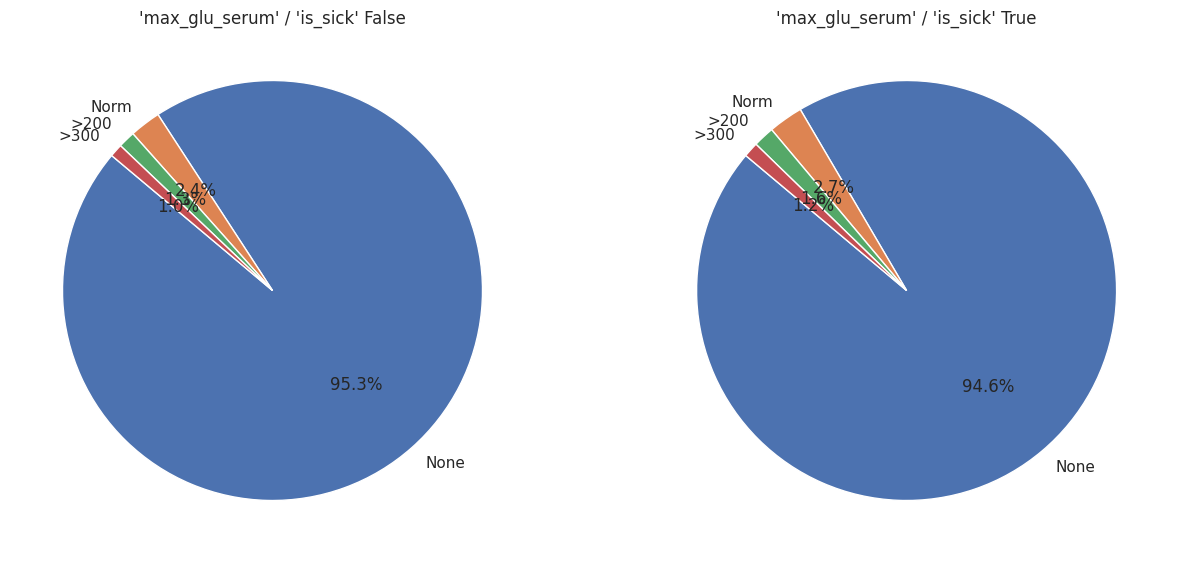

In [9]:
for feature in ("race", "diag_1_desc", "A1Cresult", "max_glu_serum"):
    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(221)
    feature_with_is_sick_false = getattr(df[(df.is_sick == False)],feature).value_counts()
    ax1.pie(
        feature_with_is_sick_false, labels=feature_with_is_sick_false.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"'{feature}' / 'is_sick' False", ha='center', va='center')
    
    ax2 = fig.add_subplot(222)
    feature_with_is_sick_true = getattr(df[(df.is_sick == True)], feature).value_counts()
    ax2.pie(
        feature_with_is_sick_true, labels=feature_with_is_sick_true.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"'{feature}' / 'is_sick' True", ha='center', va='center')
    plt.show()

# Feature correlation matrix

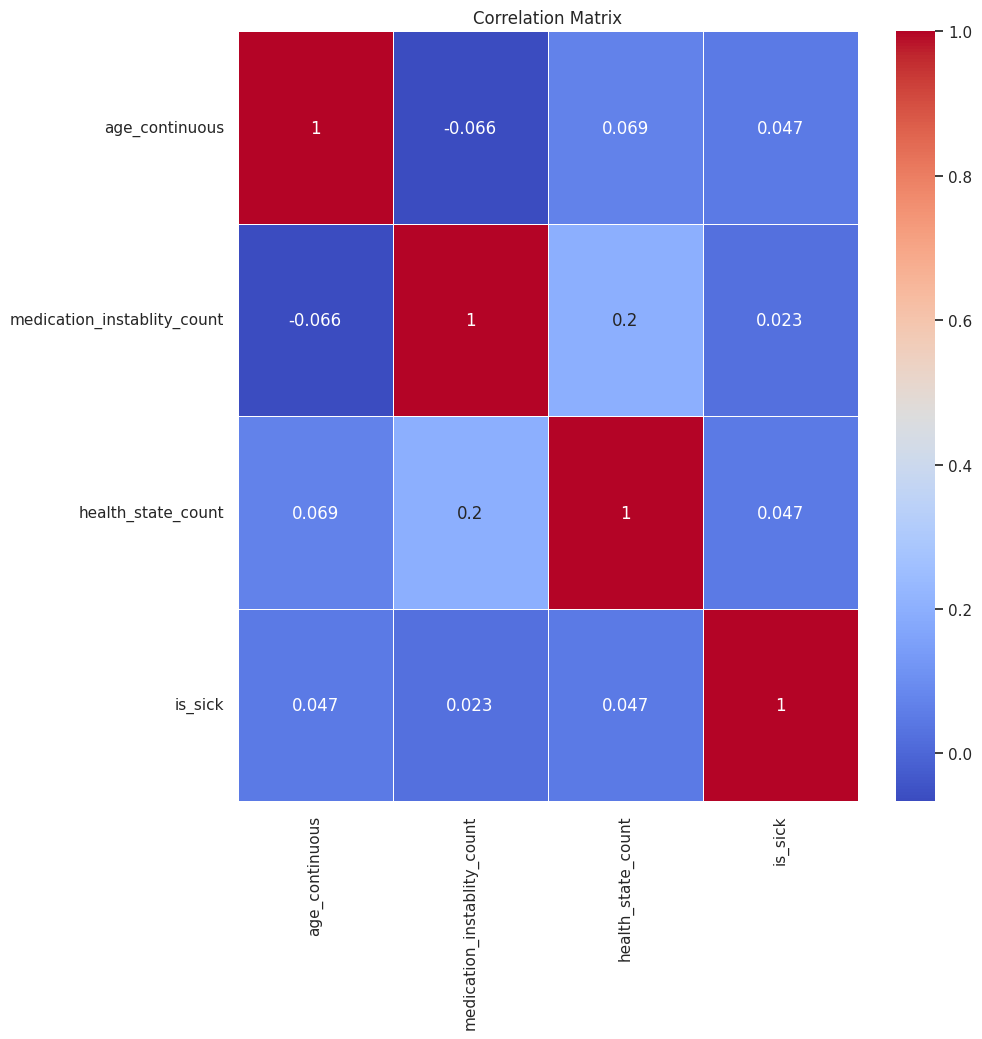

In [10]:
correlation_matrix = df[["age_continuous", "diag_1_desc", "max_glu_serum", "A1Cresult", "diabetesMed", 
                         "discharge_disposition_id_shrunk", "admission_source_id_shrunk", "medical_specialty", 
                         "race", "medication_instablity_count", "health_state_count", "is_sick"]].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

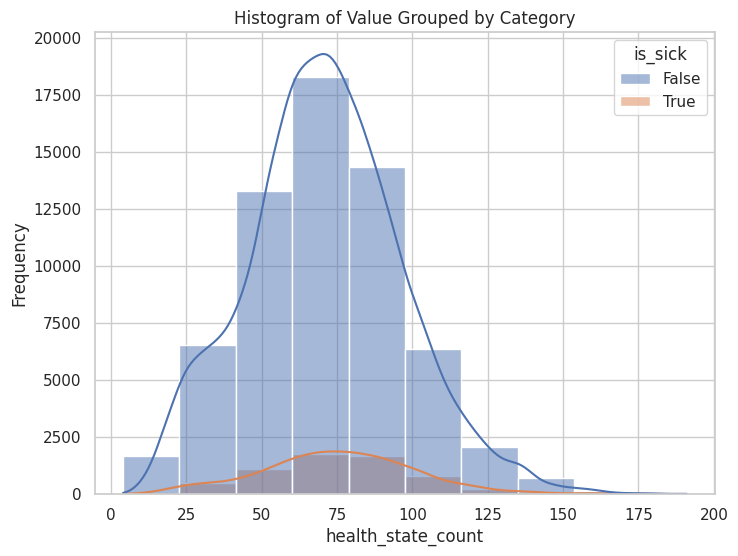

In [11]:
for feature in ("health_state_count", ):

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[["is_sick", feature]], x=feature, hue='is_sick', bins=10, kde=True)  # Adjust 'bins' as needed
    plt.title('Histogram of Value Grouped by Category')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
